<a href="https://colab.research.google.com/github/SPThole/DL-Projects/blob/master/Introductory/Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Custom dataloader

In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import skimage.io as io
from torchvision.datasets import ImageFolder
from torchvision.datasets.utils import download_url
from torchvision import transforms
%matplotlib inline

In [ ]:
url='https://cvit.iiit.ac.in/images/Projects/cartoonFaces/IIIT-CFW1.0.zip'

In [ ]:
dl_file= download_url(url,root='..')

In [ ]:
import zipfile
with zipfile.ZipFile('../IIIT-CFW1.0.zip', 'r') as zip_ref:
    zip_ref.extractall('..')

In [ ]:
class MyData(Dataset): #creating dataloader for custom dataset, it is efficient to work with batches
  def __init__(self,data,transforms=None):
    self.data= data
    self.transforms=transforms

  def __getitem__(self,idx):
    img,lb= self.data[idx] #since we are loading custom dataset using the image folder we will get tuple
    if self.transforms:    #if we have applied transforms to the dataset then it will give out transformed data
      img=self.transforms(img)
    return img

  def __len__(self):
    return len(self.data)


In [ ]:
train_transforms= transforms.Compose([ transforms.ToPILImage(),
                                      transforms.Resize((28,28)),
                                      transforms.ToTensor()])

In [ ]:
image_to_data= ImageFolder('/IMFOLDER/', transform=transforms.ToTensor())
#keep image folder in separate folder as this command goes in subfolders

In [ ]:
data= MyData(image_to_data,transforms=train_transforms)

In [ ]:
train_part, test_part= torch.utils.data.random_split(data,[8000,928])

In [ ]:
train_loader= DataLoader(train_part,batch_size=128)#see sampler and shuffle too
test_loader= DataLoader(test_part,batch_size=128)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

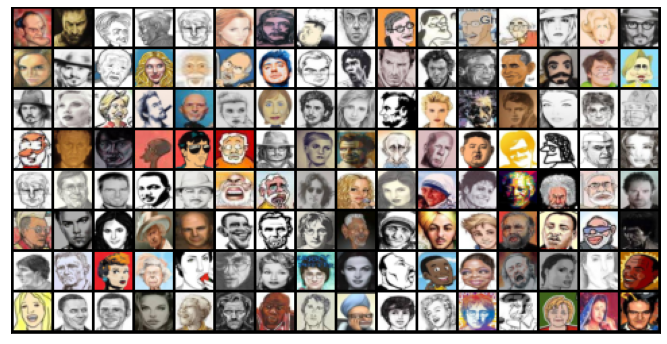

In [ ]:
show_batch(train_loader)

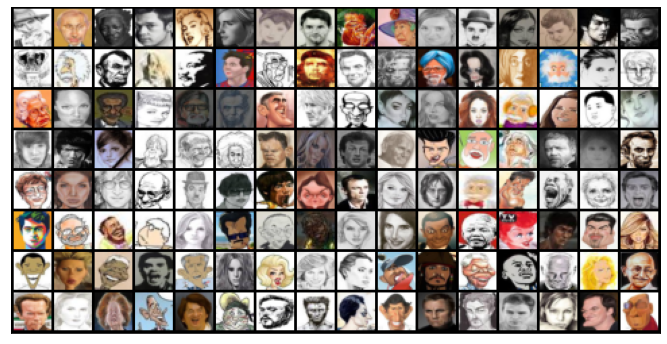

In [ ]:
show_batch(test_loader)

Text data loader